# Mascara Facial con Mediapipe

## Opciones de Configuración

- STATIC_IMAGE_MODE: Si se establece en false, la solución trata las imágenes de entrada como una transmisión de video. Intentará detectar caras en las primeras imágenes de entrada y tras una detección exitosa, localiza aún más los puntos de referencia de la cara. En imágenes posteriores, una vez todas `max_num_faces` se detectan caras y se localizan los puntos de referencia de la cara correspondiente, simplemente rastrea esos puntos de referencia sin invocar otra detección hasta que pierde el rastro de cualquiera de las caras. Esto reduce la latencia y es ideal para procesar cuadros de video. Si se establece en `true`, la detección de caras se ejecuta en cada imagen de entrada, ideal para procesar un lote de imágenes estáticas, posiblemente no relacionadas. Predeterminado a false.

- MAX_NUM_FACES: Número máximo de caras para detectar. Predeterminado a `1`.

- REFINE_LANDMARKS: Si se debe refinar aún más las coordenadas históricas alrededor de los ojos y los labios, y generar puntos de referencia adicionales alrededor de los iris aplicando el Modelo de malla de atención. Predeterminado a false.

- MIN_DETECTION_CONFIDENCE: Valor mínimo de confianza `([0.0, 1.0])` del modelo de detección facial para que la detección se considere exitosa. Predeterminado a 0.5.

- MIN_TRACKING_CONFIDENCE: Valor mínimo de confianza `([0.0, 1.0])` del modelo de seguimiento de puntos de referencia para que los puntos de referencia se consideren rastreados con éxito, o de lo contrario la detección de rostros se invocará automáticamente en la siguiente imagen de entrada. Establecerlo en un valor más alto puede aumentar la robustez de la solución, a expensas de una latencia más alta. Ignorado si static_image_mode es true, donde la detección de caras simplemente se ejecuta en cada imagen. Predeterminado a `0.5.`

[Fuente](https://google.github.io/mediapipe/solutions/face_mesh.html)

**Salida**

- MULTI_FACE_LANDMARKS: Colección de caras detectadas / rastreadas, donde cada cara se representa como una lista de 468 puntos de referencia de la cara y cada punto de referencia se compone de ` x, y y z. x y ` y se normalizan a `[0.0, 1.0]` por el ancho y la altura de la imagen respectivamente. z representa la profundidad de punto de referencia con la profundidad en el centro de la cabeza como origen, y cuanto menor sea el valor, más cerca estará el punto de referencia de la cámara. La magnitud de z usa aproximadamente la misma escala que `x`.

[Fuente](https://google.github.io/mediapipe/solutions/face_mesh.html)

### Codigo

In [22]:
import mediapipe as mp
import cv2 as cv 
from IPython.display import Image

mp_face_mask = mp.solutions.face_mesh

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [23]:
mp_mascara = mp_face_mask.FaceMesh(static_image_mode=True, 
                                   refine_landmarks=True,
                                   max_num_faces=2)

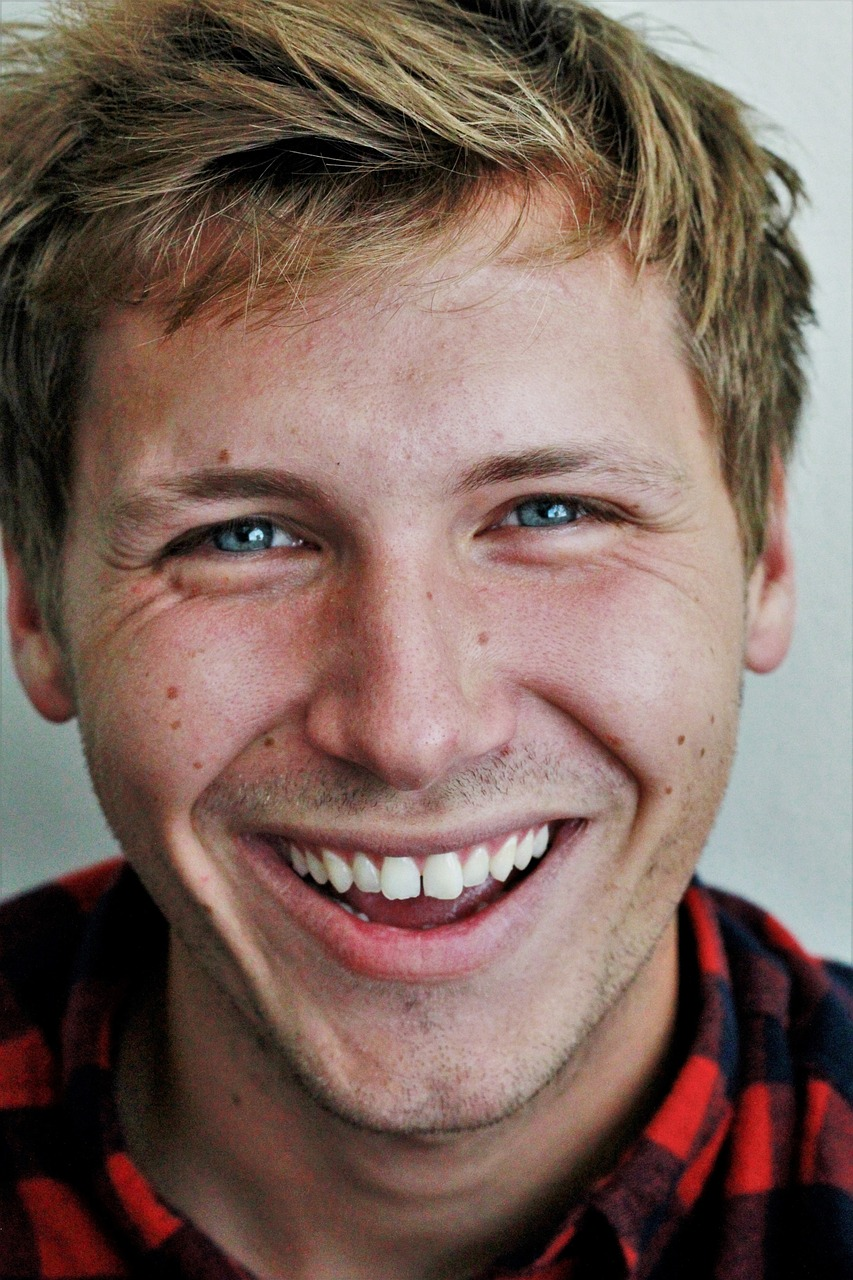

In [24]:
path = "man.jpg"

Image(path)

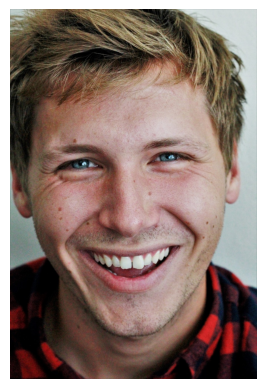

In [25]:
import matplotlib.pyplot as plt
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [26]:
results = mp_mascara.process(img)

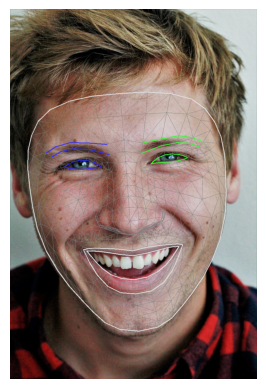

In [27]:
if results.multi_face_landmarks:
    
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
          image=img,
          landmark_list=face_landmarks,
          connections=mp_face_mask.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(
          image=img,
          landmark_list=face_landmarks,
          connections=mp_face_mask.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        
        mp_drawing.draw_landmarks(
          image=img,
          landmark_list=face_landmarks,
          connections=mp_face_mask.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

plt.imshow(img)
plt.axis("off")
plt.show()        


## Deteccion en Tiempo real

In [34]:
import mediapipe as mp
import cv2 as cv 
from IPython.display import Image

mp_face_mask = mp.solutions.face_mesh

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

mp_mascara = mp_face_mask.FaceMesh(static_image_mode=False, 
                                   refine_landmarks=True,
                                   max_num_faces=2)

def mask_face(img_pros):
    img_pros = cv.cvtColor(img_pros, cv.COLOR_BGR2RGB)
    results = mp_mascara.process(img_pros)
    
    if results.multi_face_landmarks:
    
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
              image=img_pros,
              landmark_list=face_landmarks,
              connections=mp_face_mask.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            mp_drawing.draw_landmarks(
              image=img_pros,
              landmark_list=face_landmarks,
              connections=mp_face_mask.FACEMESH_CONTOURS,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

            mp_drawing.draw_landmarks(
              image=img_pros,
              landmark_list=face_landmarks,
              connections=mp_face_mask.FACEMESH_IRISES,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

        img_pros = cv.cvtColor(img_pros, cv.COLOR_RGB2BGR)
    return img_pros

##----------PRINCIPAL CODDE -------------------
cv.namedWindow("Mask Detection", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame= cap.read()
    if ret:
        
        img_ret = mask_face(frame)
        cv.imshow("Mask Detection", img_ret)
        
        key = cv.waitKey(5)
        if key==27:
            break
    else:
        break
        
cap.release()
cv.destroyAllWindows()